In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
zoo = pd.read_csv("./zoo/zoo.data", header=None)
zoo.columns = [
    "animal name",
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "legs",
    "tail",
    "domestic",
    "catsize",
    "type",
]
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
#To find the number of values in each feature
for col in zoo.columns:
    print(zoo[col].value_counts())

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64
0    58
1    43
Name: hair, dtype: int64
0    81
1    20
Name: feathers, dtype: int64
1    59
0    42
Name: eggs, dtype: int64
0    60
1    41
Name: milk, dtype: int64
0    77
1    24
Name: airborne, dtype: int64
0    65
1    36
Name: aquatic, dtype: int64
1    56
0    45
Name: predator, dtype: int64
1    61
0    40
Name: toothed, dtype: int64
1    83
0    18
Name: backbone, dtype: int64
1    80
0    21
Name: breathes, dtype: int64
0    93
1     8
Name: venomous, dtype: int64
0    84
1    17
Name: fins, dtype: int64
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
1    75
0    26
Name: tail, dtype: int64
0    88
1    13
Name: domestic, dtype: int64
0    57
1    44
Name: catsize, dtype: int64
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: i

In [6]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [7]:
#Checking if the data contains null or na values
print(zoo.isna().values.any())
print(zoo.isnull().values.any())

False
False


In [8]:
#Feature Selection
X = zoo.drop(['animal name', 'type'], axis=1)
y = zoo['type']

In [9]:
#Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((70, 16), (31, 16))

In [10]:
y_train.shape, y_test.shape

((70,), (31,))

Decision Tree with Gini Index

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
ID3 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
ID3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [13]:
#Predicting the Test Dataset
y_pred_ID3 = ID3.predict(X_test)
y_pred_ID3[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [14]:
#Predicting the Train Dataset
y_pred_train_ID3 = ID3.predict(X_train)
y_pred_train_ID3

array([3, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4, 2, 4, 1, 1, 1, 3, 3, 1, 7, 7,
       1, 1, 4, 4, 2, 1, 1, 1, 7, 2, 2, 1, 1, 1, 7, 1, 4, 1, 3, 2, 2, 1,
       3, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 3, 2, 4, 2, 2, 7, 1, 4, 4, 2, 4,
       2, 7, 4, 7], dtype=int64)

In [15]:
#checking Accuracy Score
from sklearn.metrics import accuracy_score
print("Model Accuracy Score with Criterion Entropy for Test Data {0: 0.4f}".format(accuracy_score(y_pred_ID3, y_test)))
print("Model Accuracy Score with Criterion Entropy for Train Data {0: 0.4f}".format(accuracy_score(y_pred_train_ID3, y_train)))

Model Accuracy Score with Criterion Entropy for Test Data  0.7742
Model Accuracy Score with Criterion Entropy for Train Data  0.9286


In [16]:
#Finding the Important variables
feature_importances = ID3.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

hair: 0.0
feathers: 0.2812414435732963
eggs: 0.0
milk: 0.44247831347574273
airborne: 0.0
aquatic: 0.0
predator: 0.0
toothed: 0.0
backbone: 0.10142176556031003
breathes: 0.0
venomous: 0.0
fins: 0.17485847739065088
legs: 0.0
tail: 0.0
domestic: 0.0
catsize: 0.0


[Text(0.7142857142857143, 0.9, 'milk <= 0.5\nentropy = 2.356\nsamples = 70\nvalue = [26, 17, 4, 11, 2, 3, 7]\nclass = Mammal'),
 Text(0.5714285714285714, 0.7, 'feathers <= 0.5\nentropy = 2.233\nsamples = 44\nvalue = [0, 17, 4, 11, 2, 3, 7]\nclass = Bird'),
 Text(0.42857142857142855, 0.5, 'fins <= 0.5\nentropy = 2.071\nsamples = 27\nvalue = [0, 0, 4, 11, 2, 3, 7]\nclass = Fish'),
 Text(0.2857142857142857, 0.3, 'backbone <= 0.5\nentropy = 1.85\nsamples = 16\nvalue = [0, 0, 4, 0, 2, 3, 7]\nclass = Invertebrate'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.881\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 3, 7]\nclass = Invertebrate'),
 Text(0.42857142857142855, 0.1, 'entropy = 0.918\nsamples = 6\nvalue = [0, 0, 4, 0, 2, 0, 0]\nclass = Reptile'),
 Text(0.5714285714285714, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0, 0, 0]\nclass = Fish'),
 Text(0.7142857142857143, 0.5, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17, 0, 0, 0, 0, 0]\nclass = Bird'),
 Text(0.8571428571428571, 0.7, 'en

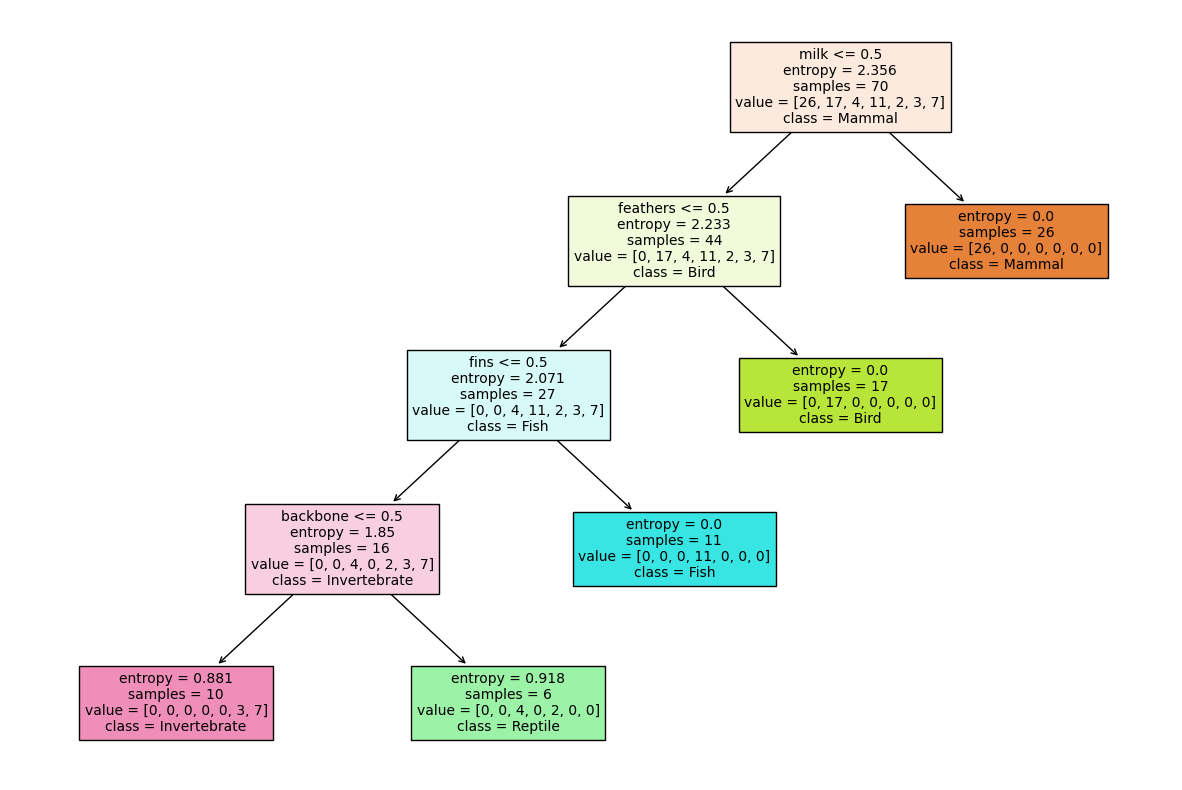

In [17]:
#Plotting the Decision Tree
plt.figure("Decision Tree", figsize=(15, 10))

from sklearn import tree
tree.plot_tree(ID3, fontsize=10, filled=True, feature_names=list(X.columns), class_names=["Mammal", "Bird", "Reptile", "Fish", "Amphibian", "Bug", "Invertebrate"])
#plt.tight_layout()
#plt.show()


In [18]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)